# Gradientenverfahren

Eine ungleich effektivere Methode ist die Anwendung des _Gradientenverfahrens_. Eine elegante Methode ist es, zunächst die Annäherung an das Optimum selbst als Kurve darzustellen - was geschieht, wenn wir uns nähern?

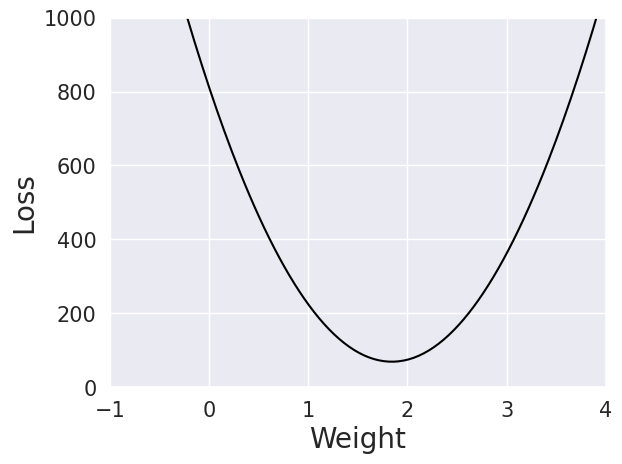

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def predict(X, w, b):
    return X * w + b

def loss(X, Y, w, b):
    return np.average((predict(X, w, b) - Y) ** 2)

X, Y = np.loadtxt("pizza.txt", skiprows=1, unpack=True)

sns.set()  # Activate Seaborn

# Compute losses for w ranging from -1 to 4
weights = np.linspace(-1.0, 4.0, 200)
losses = [loss(X, Y, w, 0) for w in weights]

# Plot weights and losses
plt.axis([-1, 4, 0, 1000])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Weight", fontsize=20)
plt.ylabel("Loss", fontsize=20)
plt.plot(weights, losses, color="black")

# Put a green cross on the minimum loss
#min_index = np.argmin(losses)
#plt.plot(weights[min_index], losses[min_index], "gX", markersize=26)

plt.show()


Diese Kurve zeigt die Entwicklung der Verluste im Intervall von $w$ zwischen -1 und 4. Erwartungsgemäß finden wir das Minimum der Kurve bei $w=1.840$ und mit einem Verlust von dann 69.123947. Mit anderen Worten: die "Lösung" unseres Trainings liegt im Minimum der Näherungskurve.

Die Gleichung der Verlustkurve entspricht der mathematischen Darstellung unserer bisherigen Methode `loss`, nämlich

$$ L = {\frac 1 m} \sum_{i=1}^m ((wx_i + b) - y_i)^2 $$

Das ist die mathematische Übersetzung des Rückgabewerts unserer `loss`-Methode:

``` python
np.average((predict(X, w, b) - Y) ** 2)
```
Und von diesem mathematischen Ausdruck können wir leicht die optimale Näherung, also den geringsten Verlust als Minimum der ersten Ableitung der Funktion ausdrücken:

$$ {\frac {\partial L} {\partial w}} = {\frac 2 m} \sum_{i=1}^m x_i ((wx_i + b) - y_i) $$

Das ist die Ableitung der Verluste nach dem Gewicht - wir erhalten eine Gerade, die das Gefälle der Verlustkurve ausdrückt und im Verlustminimum keine Neigung hat (also parallel zur Gewichtsachse läuft). Mit einem Bias von 0 ließe sich der Gradient so ausdrücken in Python:

```python
np.average(X * (predict(X, w, 0) - Y))
```

Damit können wir einen neuen Trainingsalgorithmus entwickeln: den _Gradientenabstieg_. Die Idee

In [8]:
import numpy as np

def predict(X, w, b):
    return X * w + b

def loss(X, Y, w, b):
    return np.average((predict(X, w, b) - Y) ** 2)

def gradient(X, Y, w):
    return 2 * np.average(X * (predict(X, w, 0) - Y))

def train(X, Y, iterations, lr):
    w = 0
    for i in range(iterations):
        l = loss(X, Y, w, 0)
        g = gradient(X, Y, w)
        print("Iteration %4d => Loss: %.10f Gradient: %.10f" % (i, l, g))
        w -= g * lr
    return w

X, Y = np.loadtxt("pizza.txt", skiprows=1, unpack=True)
w = train(X, Y, iterations=100, lr=0.001)
print("\nw=%.10f" % w)


Iteration    0 => Loss: 812.8666666667 Gradient: -806.79999999999995452526
Iteration    1 => Loss: 304.3630879787 Gradient: -453.74432000000007292329
Iteration    2 => Loss: 143.5265791020 Gradient: -255.18580556799992109518
Iteration    3 => Loss: 92.6549949641 Gradient: -143.51649705144322410888
Iteration    4 => Loss: 76.5646303400 Gradient: -80.71367794173157506066
Iteration    5 => Loss: 71.4753484132 Gradient: -45.39337247442979617063
Iteration    6 => Loss: 69.8656402969 Gradient: -25.52923267961935849257
Iteration    7 => Loss: 69.3564996643 Gradient: -14.35764045901795249449
Iteration    8 => Loss: 69.1954616593 Gradient: -8.07473699415169399174
Iteration    9 => Loss: 69.1445263431 Gradient: -4.54123208551094137420
Iteration   10 => Loss: 69.1284158205 Gradient: -2.55398892489135542760
Iteration   11 => Loss: 69.1233201627 Gradient: -1.43636337135892233619
Iteration   12 => Loss: 69.1217084379 Gradient: -0.80781076005222351988
Iteration   13 => Loss: 69.1211986595 Gradient: -